In [1]:
import matplotlib.pyplot as plt
import numpy as np
import nibabel as nib

#mask_dir = 'datasets/train/LGE_label/patient1_LGE_manual.nii.gz'
mask_dir = '../datasets/train/all_label/patient3_C0_manual.nii.gz'
mask = nib.load(mask_dir)
mask = mask.get_fdata()
print(mask.shape)
print(mask.dtype)
print(mask.max())
print(mask.min())

(256, 256, 12)
float64
600.0
0.0


(256, 256)
600.0


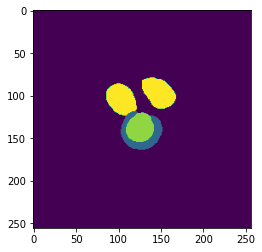

In [2]:
# 读取slice
slices = mask[:,:,10]
print(slices.shape)
print(slices.max())
plt.imshow(slices)

In [3]:
# 看标签具体的值
labels = slices.flatten().tolist()
labels = set(labels)
print(labels)

{0.0, 600.0, 500.0, 200.0}


0.0 -- 背景  
200.0 -- 心肌层  
500.0 -- LV左心室  
600.0 -- RV右心室  

In [11]:
# 实现mask的one-hot编码
label = [[0.0],[200.0],[500.0],[600.0]]
def mask2onehot(mask, label):
    '''
    input [H W]
    output [H W 4] for 4 classes {backgroud LV myo RV}
    '''
    # expand dims to [H W 1]
    mask = np.expand_dims(mask, axis=2)
    seg_map = []
    for i in label:
        equality = np.equal(i, mask)
        class_map = np.all(equality, axis=-1)
        seg_map.append(class_map)
    seg_map = np.stack(seg_map, axis=-1).astype(np.float32)
    return seg_map

# 实现one-hot的mask编码
def onehot2mask(onehot, label):
    '''
    input [4 H W]
    output [H W]
    '''
    x = np.argmax(onehot, axis=-1)
    color_codes = np.array(label)
    x = np.float32(color_codes[x.astype(np.uint8)])
    x = x.squeeze()
    return x


(4, 256, 256)
(256, 256, 4)
True
(256, 256, 4)
(256, 256)
True
{0.0, 600.0, 500.0, 200.0}


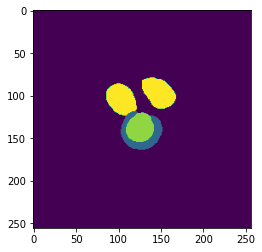

In [13]:
one_hot = mask2onehot(slices,label)
one_hot1 = np.reshape(one_hot,(4,256,256))
one_hot2 = np.reshape(one_hot1,(256,256,4))
print((one_hot2==one_hot).all())
print(one_hot.shape)
mask = onehot2mask(one_hot,label)
print(mask.shape)
print((mask == slices).all())
sets = set(mask.flatten().tolist())
print(sets)
plt.imshow(mask)